##***Stock Market Prediction***

###***Use a dataset of stock market data and build a model that can predict future stock prices***

***Importing all libraries which was important for this task***

In [ ]:
# first we import all libraries which was important for this task

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

***Extract the data file in the pandas dataframe:-***

In [ ]:
# Here we import the file from website to the variable URL
url = 'https://www.kaggle.com/datasets/borismarjanovic/price-volume-data-for-all-us-stocks-etfs'

# Download the data from Kaggle
!kaggle datasets download -d borismarjanovic/price-volume-data-for-all-us-stocks-etfs

# Unzip the downloaded file
!unzip price-volume-data-for-all-us-stocks-etfs.zip

Streaming output truncated to the last 5000 lines.
  inflating: Stocks/ergf.us.txt      
  inflating: Stocks/erh.us.txt       
  inflating: Stocks/eri.us.txt       
  inflating: Stocks/eric.us.txt      
  inflating: Stocks/erie.us.txt      
  inflating: Stocks/erii.us.txt      
  inflating: Stocks/erj.us.txt       
  inflating: Stocks/erm.us.txt       
  inflating: Stocks/ern.us.txt       
  inflating: Stocks/eros.us.txt      
  inflating: Stocks/eryp.us.txt      
  inflating: Stocks/es.us.txt        
  inflating: Stocks/esba.us.txt      
  inflating: Stocks/esbk.us.txt      
  inflating: Stocks/esca.us.txt      
  inflating: Stocks/esdi.us.txt      
  inflating: Stocks/esdiw.us.txt     
  inflating: Stocks/ese.us.txt       
  inflating: Stocks/esea.us.txt      
  inflating: Stocks/eses.us.txt      
  inflating: Stocks/esg.us.txt       
  inflating: Stocks/esgd.us.txt      
  inflating: Stocks/esge.us.txt      
  inflating: Stocks/esgf.us.txt      
  inflating: Stocks/esgg.us.txt      

***There are around 100 on stocks data of many company so i use WWE companies Data***

In [ ]:
# Load the data into a Pandas DataFrame
stock_wwe = pd.read_csv('Stocks/wwe.us.txt')

stock_wwr = pd.read_csv('Stocks/wwr.us.txt')

stock_ufc = pd.read_csv('Stocks/ufcs.us.txt')

stock_sbi = pd.read_csv('Stocks/sbi.us.txt')

In [ ]:
print(np.shape(stock_wwe))
print(np.shape(stock_wwr))
print(np.shape(stock_ufc))
print(np.shape(stock_sbi))

(3201, 7)
(3201, 7)
(3201, 7)
(3200, 7)


***Printing the Table :-***

In [ ]:
df = pd.concat([stock_wwe,stock_wwr,stock_ufc,stock_sbi], axis=0)

print(df.shape)

(12803, 7)


In [ ]:
print(df.head(10))

         Date    Open   High     Low   Close  Volume  OpenInt
0  2005-02-25  9.2418  9.623  9.2418  9.4155  131341        0
1  2005-02-28  9.4702  9.688  9.2946  9.6300  108073        0
2  2005-03-01  9.6880  9.711  9.4632  9.4702  109781        0
3  2005-03-02  9.5070  9.567  9.4553  9.5070  120955        0
4  2005-03-03  9.4702  9.545  9.4293  9.4553   55219        0
5  2005-03-04  9.4383  9.584  9.4383  9.4461   74151        0
6  2005-03-07  9.5150  9.782  9.5150  9.7820  381280        0
7  2005-03-08  9.6880  9.782  9.6680  9.6880   52722        0
8  2005-03-09  9.6530  9.841  9.5840  9.6230   91508        0
9  2005-03-10  9.5990  9.727  9.5840  9.6230   79019        0


####***Make a basic Plot of Stock Price :-***

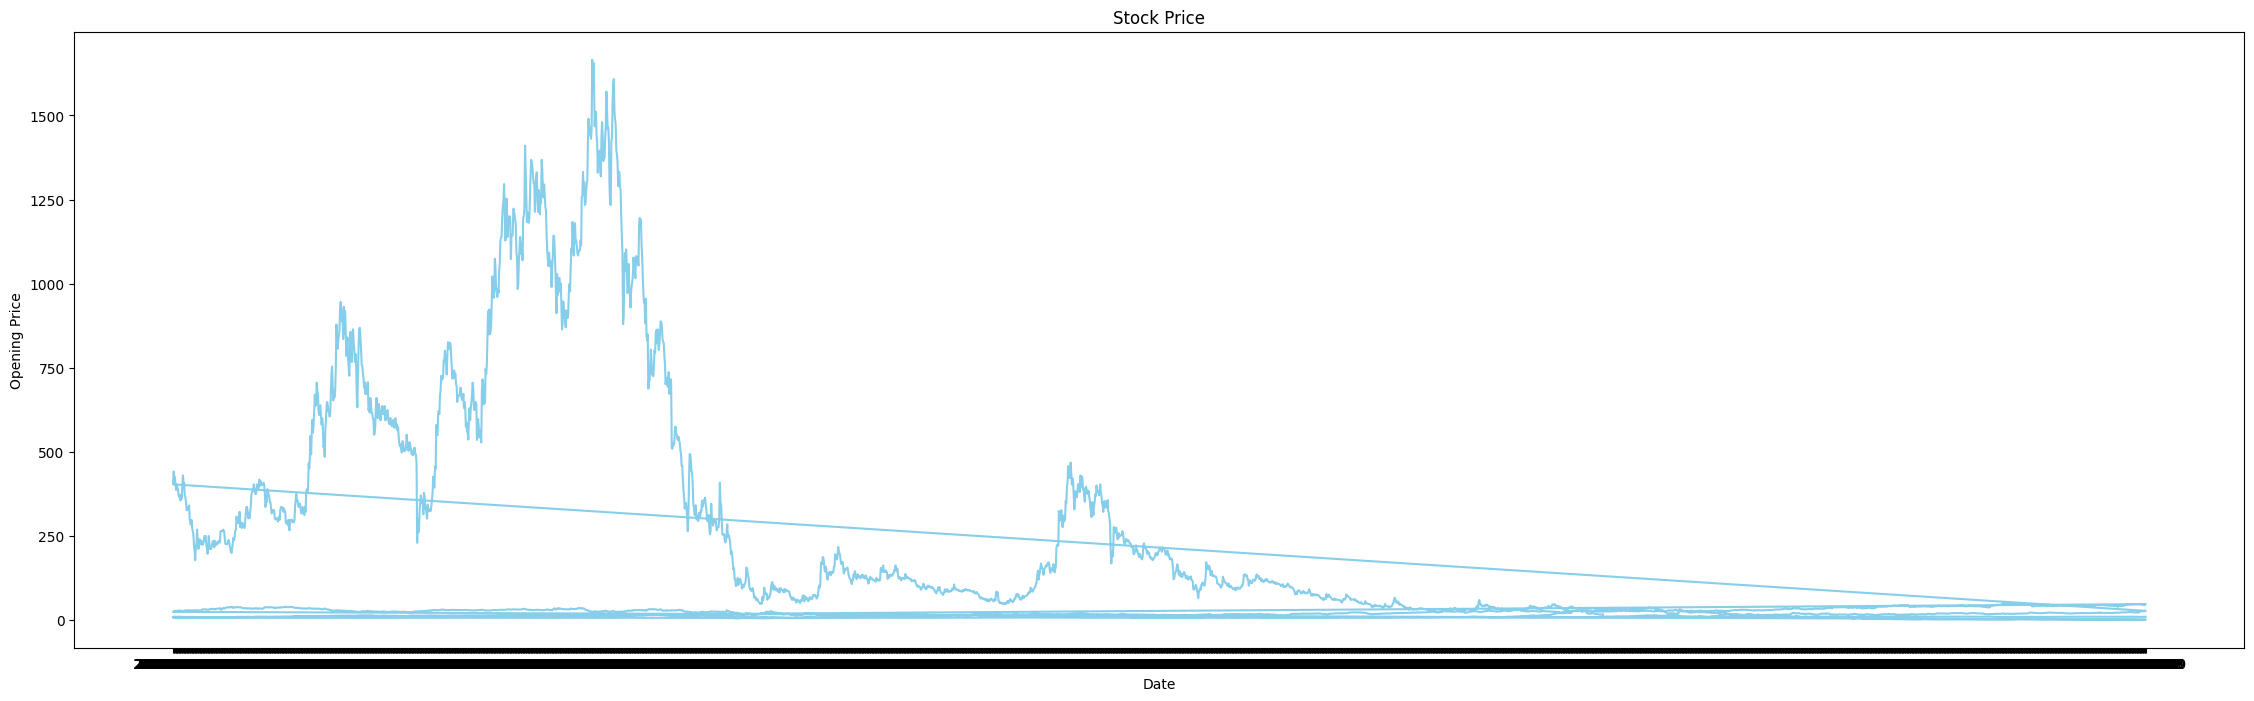

In [ ]:
#Plot a stock chart of opening stock price with respect to Date
plt.figure(figsize=(28,8))
plt.plot(df['Date'], df['Open'] , color="Skyblue")
plt.xlabel("Date")
plt.ylabel("Opening Price")
plt.title("Stock Price")
plt.show()

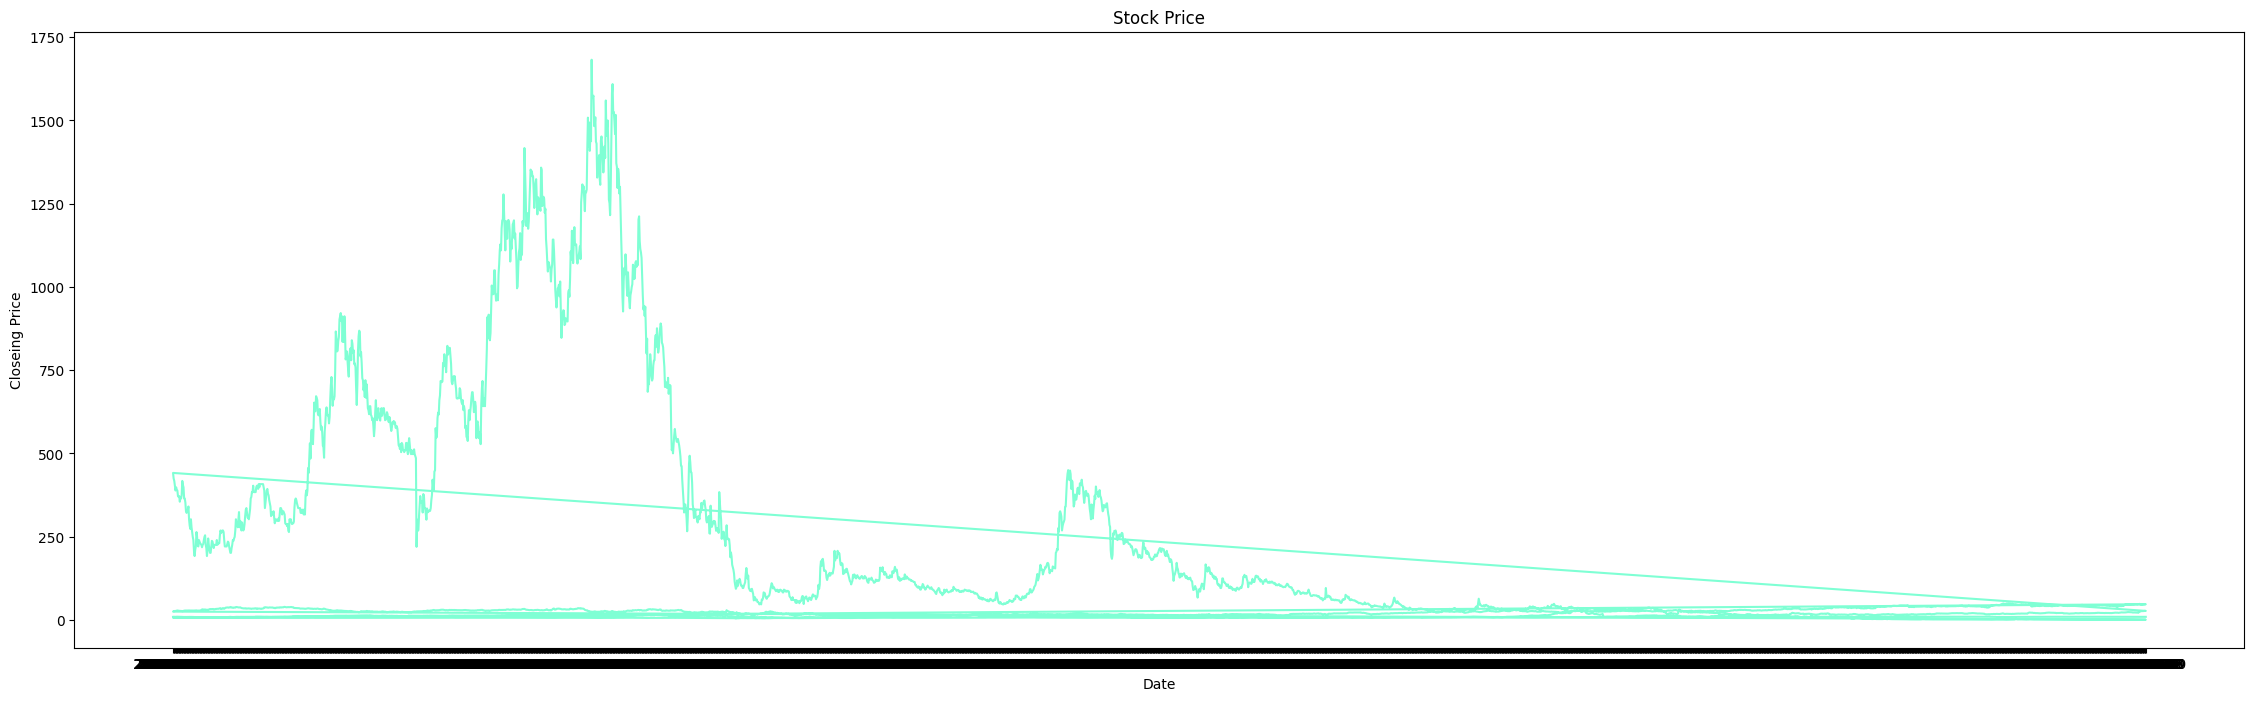

In [ ]:
#Plot a stock chart of Closeing stock price with respect to Date
plt.figure(figsize=(28,8))
plt.plot(df['Date'], df['Close'], color="aquamarine")
plt.xlabel("Date")
plt.ylabel("Closeing Price")
plt.title("Stock Price")
plt.show()

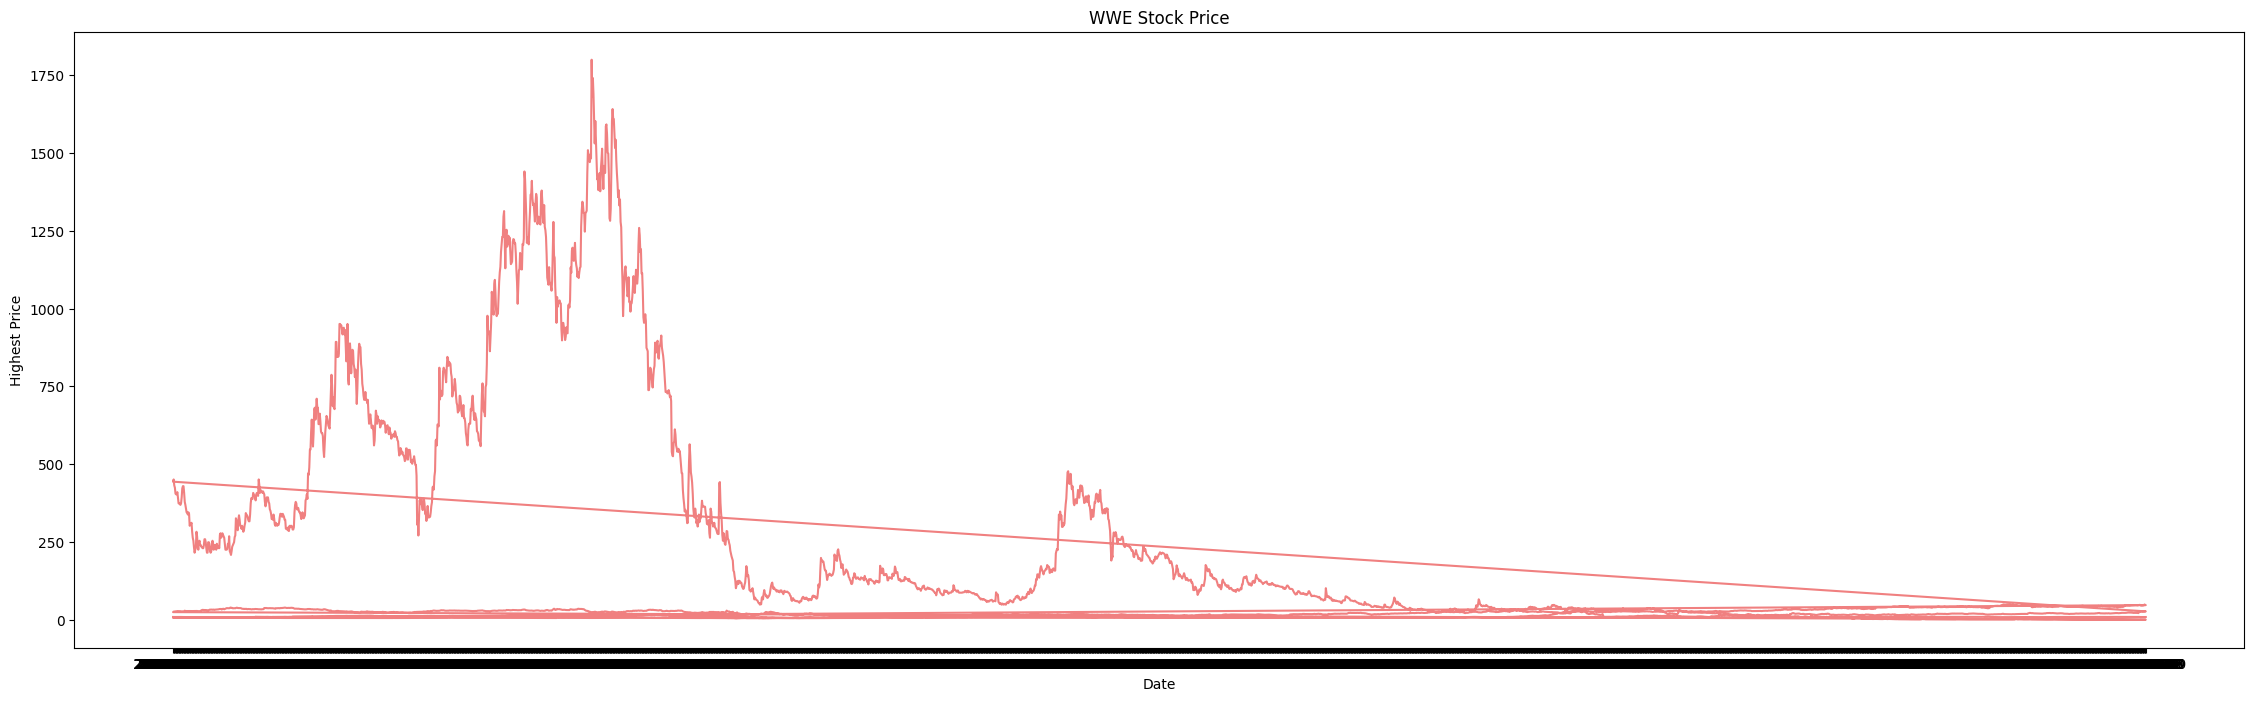

In [ ]:
#Plot a stock chart of Highest stock price with respect to Date
plt.figure(figsize=(28,8))
plt.plot(df['Date'], df['High'] , color="lightcoral")
plt.xlabel("Date")
plt.ylabel("Highest Price")
plt.title("WWE Stock Price")
plt.show()

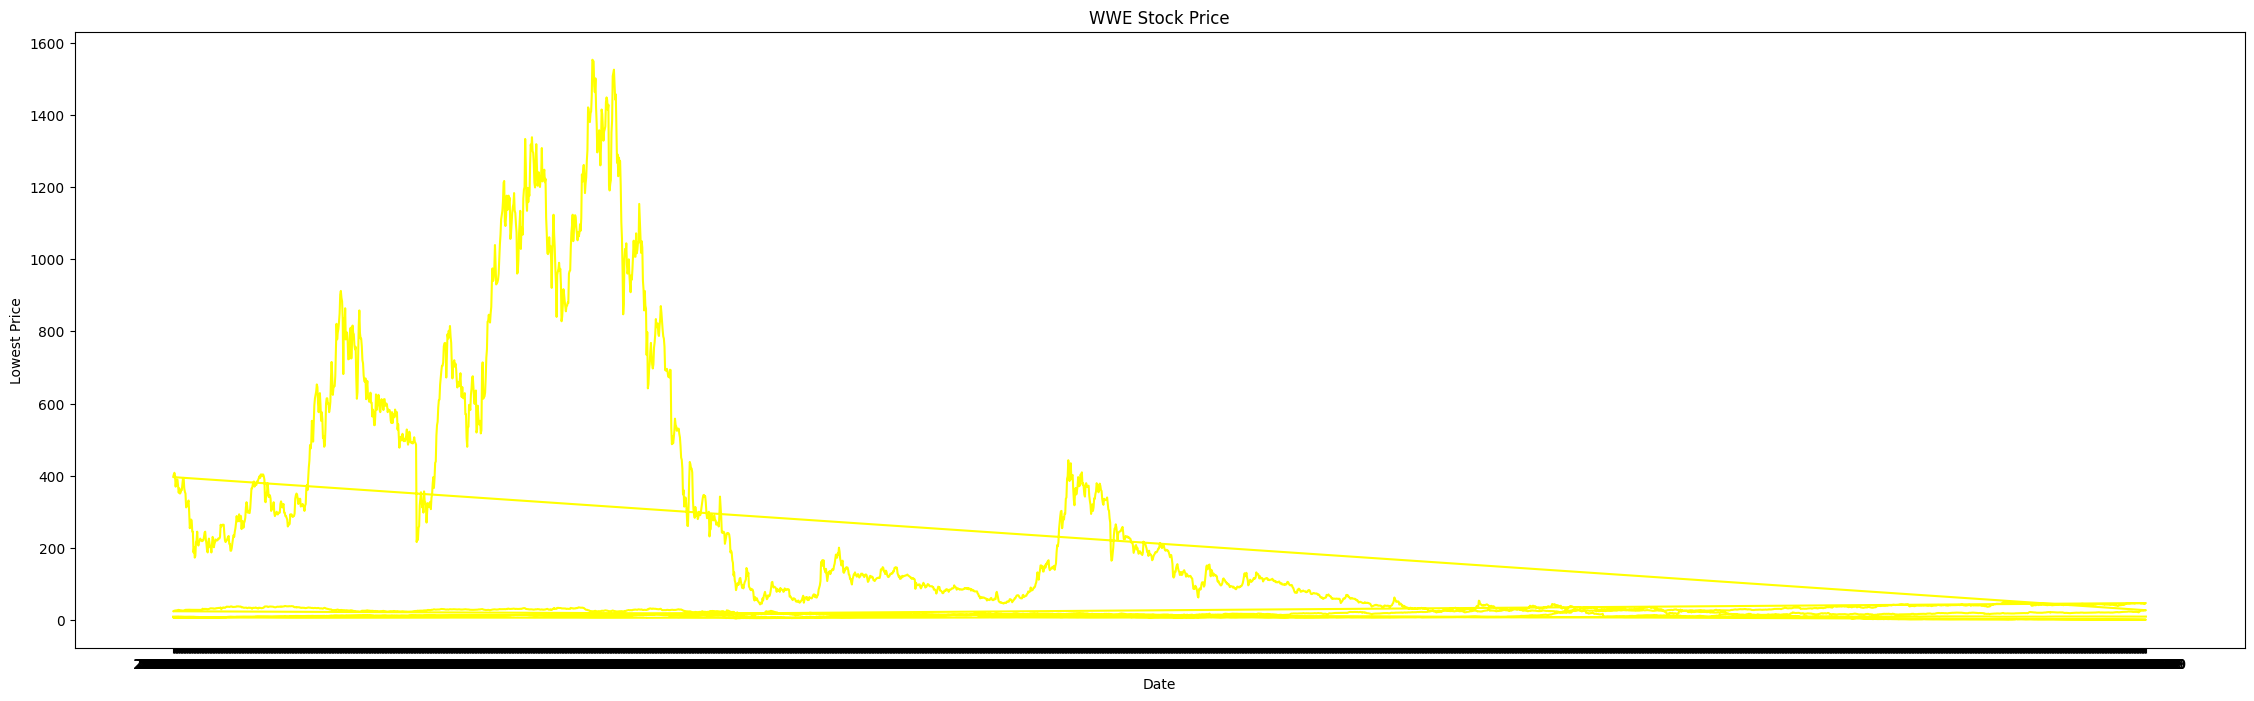

In [ ]:
#Plot a stock chart of Lowest stock price with respect to Date
plt.figure(figsize=(28,8))
plt.plot(df['Date'], df['Low'] , color="yellow")
plt.xlabel("Date")
plt.ylabel("Lowest Price")
plt.title("WWE Stock Price")
plt.show()

####***Info about datatype of all columns :-***

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12803 entries, 0 to 3199
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     12803 non-null  object 
 1   Open     12803 non-null  float64
 2   High     12803 non-null  float64
 3   Low      12803 non-null  float64
 4   Close    12803 non-null  float64
 5   Volume   12803 non-null  int64  
 6   OpenInt  12803 non-null  int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 800.2+ KB


####***Deleting Unrequired Columns:-***

In [ ]:
#Delete OpenInt column
del df['OpenInt']

####***Making new Columns for Table:-***

In [ ]:
#Make a new column as Next Day which is the close stock price of current day
df["Next Day Open"] = df['Close'].shift(-1)
print(df)

            Date    Open    High     Low   Close  Volume  Next Day Open
0     2005-02-25  9.2418  9.6230  9.2418  9.4155  131341         9.6300
1     2005-02-28  9.4702  9.6880  9.2946  9.6300  108073         9.4702
2     2005-03-01  9.6880  9.7110  9.4632  9.4702  109781         9.5070
3     2005-03-02  9.5070  9.5670  9.4553  9.5070  120955         9.4553
4     2005-03-03  9.4702  9.5450  9.4293  9.4553   55219         9.4461
...          ...     ...     ...     ...     ...     ...            ...
3195  2017-11-06  9.4500  9.5000  9.4420  9.4737   24424         9.4800
3196  2017-11-07  9.4600  9.4894  9.4500  9.4800   46027         9.5100
3197  2017-11-08  9.4700  9.5100  9.4514  9.5100   32471         9.4700
3198  2017-11-09  9.4600  9.5000  9.4200  9.4700   59437         9.4300
3199  2017-11-10  9.4300  9.4500  9.4300  9.4300   19869            NaN

[12803 rows x 7 columns]


In [ ]:
#Make a new column as Target which shows that the stocks up or not
df["Target"] = (df["Next Day Open"] > df["Close"]).astype(int)
print(df)

            Date    Open    High     Low   Close  Volume  Next Day Open  \
0     2005-02-25  9.2418  9.6230  9.2418  9.4155  131341         9.6300   
1     2005-02-28  9.4702  9.6880  9.2946  9.6300  108073         9.4702   
2     2005-03-01  9.6880  9.7110  9.4632  9.4702  109781         9.5070   
3     2005-03-02  9.5070  9.5670  9.4553  9.5070  120955         9.4553   
4     2005-03-03  9.4702  9.5450  9.4293  9.4553   55219         9.4461   
...          ...     ...     ...     ...     ...     ...            ...   
3195  2017-11-06  9.4500  9.5000  9.4420  9.4737   24424         9.4800   
3196  2017-11-07  9.4600  9.4894  9.4500  9.4800   46027         9.5100   
3197  2017-11-08  9.4700  9.5100  9.4514  9.5100   32471         9.4700   
3198  2017-11-09  9.4600  9.5000  9.4200  9.4700   59437         9.4300   
3199  2017-11-10  9.4300  9.4500  9.4300  9.4300   19869            NaN   

      Target  
0          1  
1          0  
2          1  
3          0  
4          0  
...      

###***Training The Dataset :-***

In [ ]:
#Make a training dataset
Data= df[["Close", "Volume", "Open", "High" , "Low" , "Target"]]

In [ ]:
#Saprate the training dataset into train_data and test_data
train_data = Data.iloc[:10242]
test_data = Data.iloc[10243:]

####***Installing the random forest classifier:-***

In [ ]:
#Installing the random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=1000 , random_state=48)

#Training the models:-
rf_classifier.fit(train_data[["Close", "Volume", "Open", "High" , "Low"]], train_data["Target"])

RandomForestClassifier(n_estimators=1000, random_state=48)

####***Making Predication:-***

In [ ]:
#Making Predication

predictions = rf_classifier.predict(test_data[["Close", "Volume", "Open", "High" , "Low"]])

#Make a dataframe of prediction
predictions_df = pd.DataFrame({"Predictions": predictions})

####***Find accuracy score of the Prediction:-***

In [ ]:
#Find accuracy score of the Prediction

accuracy = accuracy_score(test_data["Target"], predictions)
print("Accuracy:", accuracy)

Accuracy: 0.516015625


####***Making a plot between Actual result and Predicted***

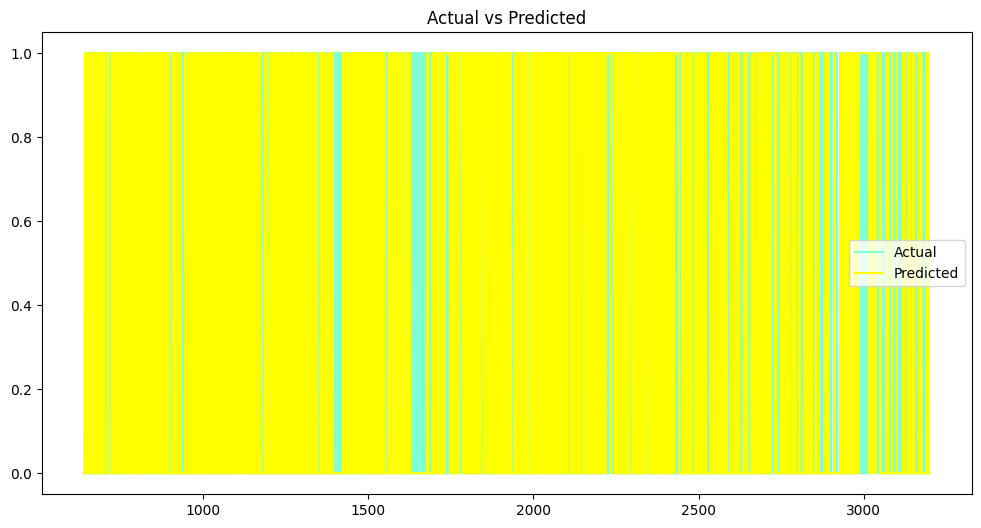

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data["Target"] , color="aquamarine" ,label="Actual")
plt.plot(test_data.index, predictions_df["Predictions"], label="Predicted" , color="yellow")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

####***Example User Data :-***

In [ ]:
#This data is a Example User Data
user_data = {
    'Close': 12.56,
    'Volume': 1445698,
    'Open': 12.56,
    'High': 12.56,
    'Low': 12.56
}

####***Converting User data into a dataframe :-***

In [ ]:
#Converting User data into a dataframe

user_data_df = pd.DataFrame(user_data,index=[0])

####***check that the dataframe was created or now:-***

In [ ]:
#Checking that the dataframe is created successfully or not

print(user_data_df)

   Close   Volume   Open   High    Low
0  12.56  1445698  12.56  12.56  12.56


####***Predicting the Value:-***

In [ ]:
#Predicting the Value
user_pred = rf_classifier.predict(user_data_df[["Close", "Volume", "Open", "High" , "Low"]])

if user_pred[0] == 1:
    print("The stock price will go High")
else:
    print("The stock price will go Low")

The stock price will go Low
